##  Project objects
- Clean dirty log data and transform it for analytics.
- Exploratory data analysis, e.g. find user activity levels for different events, and user interaction with web components.
- Find the conversion rate of users, identify key factors that bottleneck the conversion rate.
- Propose any hypothesis and set up experiments for testing.
- Build machine learning models to predict user behaviors, including but not limited to signup, churn, etc.
- Discover interesting insights in the dataset and suggest how to improve the user signup rate.

## Load data and browse data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [3]:
# Load data from file
df = pd.read_csv('data/selected_data.csv')

In [4]:
# Browse dataset
df.head(10)

,CN,CT,browser,browser_v,cpc,day,dist_id,event,freq,ip,...,count,avg_st,browser_chrome,model_bin,os_bin,CT_bin,PRO,PRO_bin,hour,worktime
0,1.0,Hangzhou,qq,7.3,0.0,2017-03-06,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,formSubmit,6.0,36.23.47.33,...,5,NaN,0,others,others,others,ZJ,ZJ,23,0
1,1.0,Guangzhou,chrome,56.0,1.0,2017-03-12,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,index_leave,1.0,111.193.183.253,...,1,921142.371000,1,mac,macosx,Guangzhou,BJ,BJ,21,0
2,1.0,Shenzhen,chrome,56.0,0.0,2017-03-07,000c46a27ef69fa22b56d253a9c72773338a1686,$pageview,22.0,27.38.250.222,...,22,1742.216571,1,pc,windows,others,GD,GD,1,1
3,1.0,Hangzhou,qq,9.5,0.0,2017-03-12,000ed1dcd942969b458c5b308937c6389c08f999,$pageview,4.0,116.226.32.214,...,4,30.680000,0,pc,windows,others,SH,SH,22,0
4,1.0,Chengdu,safari,9.0,0.0,2017-03-09,00111feff544ef5280a4c7064a362a9ea59c9389,$pageview,1.0,117.136.38.216,...,1,NaN,0,others,others,others,BJ,BJ,5,1
5,1.0,Zhengzhou,chrome,56.0,1.0,2017-03-08,0011f5066b1c62717255852fdb15a0473a5c2b19,$pageview,6.0,119.57.163.82,...,6,4.170000,1,mac,macosx,others,BJ,BJ,21,0
6,0.0,Nonthaburi,chrome,56.0,1.0,2017-03-06,0012ea1b517e6959354abaa6954711054ec831b9,index_leave,2.0,101.71.245.170,...,2,35.747000,1,pc,windows,others,ZJ,ZJ,19,0
7,1.0,Beijing,na,-1.0,0.0,2017-03-09,002232cd6da95fae1cc9a5fbaa7c2d0e11fbd57b,index_leave,3.0,223.73.25.141,...,3,18.916000,0,others,others,Beijing,GD,GD,4,1
8,1.0,NaN,micromessenger,6.5,0.0,2017-03-08,00229f012ef316de6efdcbc380ffdb2558e9ff81,$pageview,3.0,223.104.38.131,...,3,NaN,0,others,others,others,BJ,BJ,19,0
9,1.0,Wuhan,qq,6.0,0.0,2017-03-10,0023b8aa9adf510ef81d0e90e175d809f2bf6059,$pageview,1.0,153.37.200.192,...,1,NaN,0,others,others,others,JS,others,8,1


In [5]:
# Show summary stats
df.describe()

,CN,browser_v,cpc,freq,is_fd,is_ft,os_version,pageS,signup,time,weekend,count,avg_st,browser_chrome,hour,worktime
count,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,5.571000e+03,11708.000000,1.170800e+04,11708.000000,11708.000000,7.412000e+03,11708.000000,11708.000000,11708.000000
mean,0.864622,33.023361,0.470362,5.609242,0.764178,0.229587,7.753071,1.009756e+04,0.042450,1.489164e+12,0.139136,4.987444,7.860027e+03,0.557824,9.100615,0.653912
std,0.342141,21.660523,0.499142,10.500759,0.424529,0.420585,2.205608,6.525297e+04,0.201621,2.263144e+08,0.346103,9.048549,6.512723e+04,0.496666,7.732918,0.475742
min,0.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,3.300000e-02,0.000000,1.488791e+12,0.000000,1.000000,3.300000e-02,0.000000,0.000000,0.000000
25%,1.000000,9.500000,0.000000,1.000000,1.000000,0.000000,6.100000,7.478000e+00,0.000000,1.488965e+12,0.000000,1.000000,8.976813e+00,0.000000,3.000000,0.000000
50%,1.000000,45.000000,0.000000,2.000000,1.000000,0.000000,6.200000,2.704500e+01,0.000000,1.489130e+12,0.000000,2.000000,3.236250e+01,1.000000,6.000000,1.000000
75%,1.000000,55.000000,1.000000,5.000000,1.000000,0.000000,10.000000,5.896960e+02,0.000000,1.489391e+12,0.000000,5.000000,4.707285e+02,1.000000,18.000000,1.000000
max,1.000000,59.000000,1.000000,254.000000,1.000000,1.000000,10.900000,1.749192e+06,1.000000,1.489517e+12,1.000000,254.000000,2.918014e+06,1.000000,23.000000,1.000000


## Build Logistic Regression Model

#### Encode categorical columns to numeric values

In [6]:
df.columns

Index(['CN', 'CT', 'browser', 'browser_v', 'cpc', 'day', 'dist_id', 'event',
       'freq', 'ip', 'is_fd', 'is_ft', 'latest_utm_m', 'latest_utm_s', 'model',
       'os', 'os_version', 'pageS', 'signup', 'source', 'time', 'weekend',
       'count', 'avg_st', 'browser_chrome', 'model_bin', 'os_bin', 'CT_bin',
       'PRO', 'PRO_bin', 'hour', 'worktime'],
      dtype='object')

In [7]:
col_category = [ 'model_bin','os_bin','CT_bin','PRO_bin','source']

In [8]:
df_dummies = pd.get_dummies(df[col_category], columns=col_category)

In [9]:
df_dummies

,model_bin_mac,model_bin_others,model_bin_pc,os_bin_macosx,os_bin_others,os_bin_windows,CT_bin_Beijing,CT_bin_Guangzhou,CT_bin_Shanghai,CT_bin_others,PRO_bin_BJ,PRO_bin_GD,PRO_bin_SH,PRO_bin_ZJ,PRO_bin_others,source_0.0,source_1.0,source_others
0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0
5,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
6,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
7,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
8,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0
9,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [10]:
df = df.join(df_dummies)

In [11]:
df.head()

,CN,CT,browser,browser_v,cpc,day,dist_id,event,freq,ip,...,CT_bin_Shanghai,CT_bin_others,PRO_bin_BJ,PRO_bin_GD,PRO_bin_SH,PRO_bin_ZJ,PRO_bin_others,source_0.0,source_1.0,source_others
0,1.0,Hangzhou,qq,7.3,0.0,2017-03-06,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,formSubmit,6.0,36.23.47.33,...,0,1,0,0,0,1,0,0,1,0
1,1.0,Guangzhou,chrome,56.0,1.0,2017-03-12,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,index_leave,1.0,111.193.183.253,...,0,0,1,0,0,0,0,0,1,0
2,1.0,Shenzhen,chrome,56.0,0.0,2017-03-07,000c46a27ef69fa22b56d253a9c72773338a1686,$pageview,22.0,27.38.250.222,...,0,1,0,1,0,0,0,1,0,0
3,1.0,Hangzhou,qq,9.5,0.0,2017-03-12,000ed1dcd942969b458c5b308937c6389c08f999,$pageview,4.0,116.226.32.214,...,0,1,0,0,1,0,0,0,0,1
4,1.0,Chengdu,safari,9.0,0.0,2017-03-09,00111feff544ef5280a4c7064a362a9ea59c9389,$pageview,1.0,117.136.38.216,...,0,1,1,0,0,0,0,0,1,0


In [12]:
df.columns

Index(['CN', 'CT', 'browser', 'browser_v', 'cpc', 'day', 'dist_id', 'event',
       'freq', 'ip', 'is_fd', 'is_ft', 'latest_utm_m', 'latest_utm_s', 'model',
       'os', 'os_version', 'pageS', 'signup', 'source', 'time', 'weekend',
       'count', 'avg_st', 'browser_chrome', 'model_bin', 'os_bin', 'CT_bin',
       'PRO', 'PRO_bin', 'hour', 'worktime', 'model_bin_mac',
       'model_bin_others', 'model_bin_pc', 'os_bin_macosx', 'os_bin_others',
       'os_bin_windows', 'CT_bin_Beijing', 'CT_bin_Guangzhou',
       'CT_bin_Shanghai', 'CT_bin_others', 'PRO_bin_BJ', 'PRO_bin_GD',
       'PRO_bin_SH', 'PRO_bin_ZJ', 'PRO_bin_others', 'source_0.0',
       'source_1.0', 'source_others'],
      dtype='object')

In [26]:
df['avg_st'] = df['avg_st'].fillna(0)

### Define Features and Target

In [27]:
selected_features = [u'cpc',u'freq',u'count',u'worktime',u'weekend',u'avg_st',
                     u'model_bin_mac',u'model_bin_others', u'model_bin_pc', u'os_bin_macosx', u'os_bin_others',
                     u'os_bin_windows', u'CT_bin_Beijing', u'CT_bin_Guangzhou',
                     u'CT_bin_Shanghai', u'CT_bin_others', u'PRO_bin_BJ', u'PRO_bin_GD',
                     u'PRO_bin_SH', u'PRO_bin_ZJ', u'PRO_bin_others', u'source_0.0',
                     u'source_1.0', u'source_others',
                     u'is_fd', u'is_ft', u'CN']
target = u'signup'

In [28]:
X = df[selected_features].values
y = df['signup'].values

In [29]:
X.shape

(11708, 27)

#### Let's Train-test split the data!

In [44]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Logistic Regression model using sklearn

In [45]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

### Calculate the metric scores for the model

In [46]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [47]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

              train      test
metrics                      
AUC        0.994973  0.999295
Accuracy   0.997071  0.998007
Precision  1.000000  1.000000
Recall     0.930836  0.953333
f1-score   0.964179  0.976109


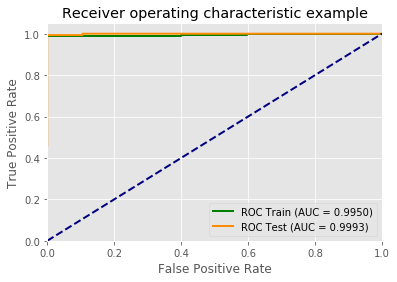

In [49]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

Understanding the Estimated Coefficients

In [50]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
1,freq,3.269469
5,avg_st,-0.000023
17,PRO_bin_GD,-0.067382
14,CT_bin_Shanghai,-0.153098
18,PRO_bin_SH,-0.229088
0,cpc,-0.241128
13,CT_bin_Guangzhou,-0.282875
19,PRO_bin_ZJ,-0.291930
23,source_others,-0.299047
4,weekend,-0.305205


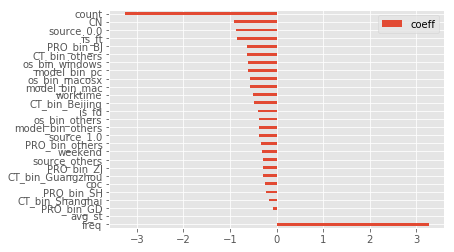

In [51]:
ax = df_coeffs.plot.barh(width=0.35)
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### model evaluation

#### confusion matrix

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [53]:
confusion_matrix(y_test, y_test_pred)

array([[3363,    0],
       [   7,  143]])

In [40]:
# Helper method to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    '''
    Code from sklearn example.
    '''
    
    cm = confusion_matrix(y_true, y_pred)

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[3373    0]
 [  11  128]]


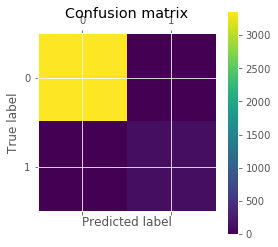

In [41]:
plot_confusion_matrix(y_train, y_train_pred)

[[7838    0]
 [  33  325]]


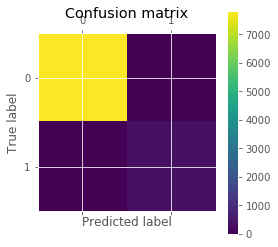

In [42]:
plot_confusion_matrix(y_test, y_test_pred)

In [43]:
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_test, y_test_pred)))

Area Under Curve (AUC) of the Logistic Regression is: 0.9539106145251397
